<a href="https://colab.research.google.com/github/yashpatil454/Retail-Shop-Sales-Prediction-Regression-/blob/main/Rossmann_Sales_Prediction_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.67 s (started: 2023-01-24 07:17:13 +00:00)


In [45]:
#Importing ML libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
#Importing metrics for model evaluation.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Mounting drive
from google.colab import drive
drive.mount('/content/gdrive')
#The default figure size to 8 inches by 5 inches and the figure resolution (dots per inch) to 100.
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
time: 3.45 s (started: 2023-01-24 07:17:17 +00:00)


In [49]:
#For hosted runtime
#Importing all the cleaned and splitted data
X_train = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_train.csv', parse_dates=['Date'])
X_test = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/X_test.csv', parse_dates=['Date'])
y_train = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_train.csv')
y_test = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/y_test.csv')
comparison_df = pd.read_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/comparison_df.csv')

#For local runtime
# X_train = pd.read_csv('C:/Users/91814/Desktop/Retail_project/X_train.csv')
# X_test = pd.read_csv('C:/Users/91814/Desktop/Retail_project/X_test.csv')
# y_train = pd.read_csv('C:/Users/91814/Desktop/Retail_project/y_train.csv')
# y_test = pd.read_csv('C:/Users/91814/Desktop/Retail_project/y_test.csv')
# comparison_df = pd.read_csv('C:/Users/91814/Desktop/Retail_project/comparison_df.csv')

time: 2.89 s (started: 2023-01-24 07:18:22 +00:00)


In [50]:
#Setting date and store as index
X_train.set_index(['Date','Store'],inplace=True)
X_test.set_index(['Date','Store'],inplace=True)
y_train.set_index(['Date','Store'],inplace=True)
y_test.set_index(['Date','Store'],inplace=True)

time: 143 ms (started: 2023-01-24 07:18:26 +00:00)


In [51]:
#Scaling the data for better model predictions.
from sklearn.preprocessing import StandardScaler

#Scaling the train and test data.
scale = StandardScaler()
X_train[list(X_train.columns)] = scale.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scale.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

time: 871 ms (started: 2023-01-24 07:18:26 +00:00)


In [52]:
#Creating a method for model evaluation that gives us the calculated metrics.
def model_eval(model, model_name):
  #making predictions
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  #Calculating metrices
  #Mean Absolute Error
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),4)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),4) 
  #Mean Squared Error 
  MSE_train = round(mean_squared_error(y_train,y_pred_train),4)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),4)
  #Root Mean Squared Error 
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  n1 = len(y_train)
  n2 = len(y_test)
  k1 = X_train.shape[1]
  k2 = X_test.shape[1]
  Adj_r2_train = round(1 - (1-R2_train) * (n1-1) / (n1-k1-1), 4)
  Adj_r2_test = round(1 - (1-R2_test) * (n2-1) / (n2-k2-1), 4)

  #Printing the results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #plotting the predictions
  y_true = y_test.copy()
  y_true['Pred Sales'] = y_pred_test.tolist()
  df_plot = y_true.reset_index(level=['Date']).groupby('Date')['Sales','Pred Sales'].sum()
  ax = sns.lineplot(data=df_plot)
  ax.xaxis.set_major_locator(plt.MaxNLocator(10))
  # sns.lineplot(data = df_plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 15)

  #Saving our results
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  return metric_scores

time: 5.47 ms (started: 2023-01-24 07:18:27 +00:00)


###Random Forest Hyperparameter Tuning

Hyperparameter tuning is the process of adjusting the parameters of the algorithm to optimize its performance. 

In [53]:
#Initializing RandomForestRegressor for hyperparameter tuning.
randomForest_tuned = RandomForestRegressor(random_state=45)

time: 1.22 ms (started: 2023-01-24 07:18:27 +00:00)


In [54]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [50, 125, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 60, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
time: 5.16 ms (started: 2023-01-24 07:18:27 +00:00)


In [55]:
#Feeding the param_grid to the model
rf_random_tuned = RandomizedSearchCV(estimator = randomForest_tuned, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=5, random_state=45, n_jobs = -1)
#Fit the random search model
rf_random_tuned.fit(X_train,y_train)
randomForest_tuned.best_params_

DecisionTreeRegressor(random_state=45)

time: 12.5 s (started: 2023-01-24 07:18:27 +00:00)


The Mean Absolute Error for the validation set is 0.1983
The Mean Squared Error for the validation set is 0.0751
The Root Mean Squared Error for the validation set is 0.274107
The R^2 for the validation set is 0.920237
The Adjusted R^2 for the validation set is 0.9202


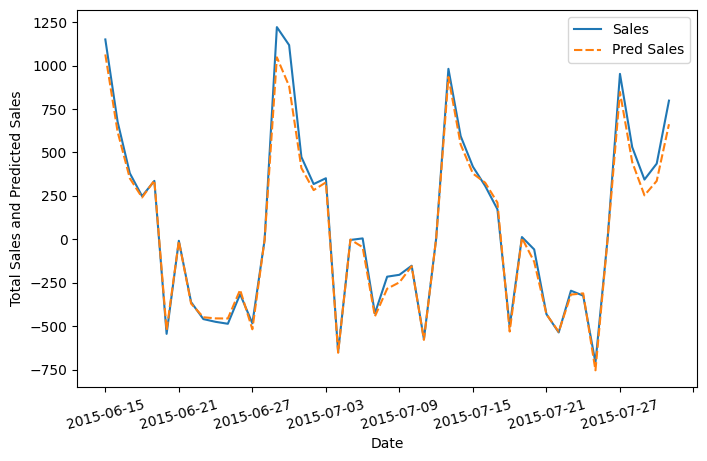

time: 1.73 s (started: 2023-01-24 07:19:01 +00:00)


In [57]:
#Evaluating the model by visualizing it and by metrics
Random_forest_tuned = model_eval(rf_random_tuned, 'Random Forest Regressor Tuned')
comparison_df.drop('Unnamed: 0', inplace = True, axis = 1)
comparison_df = comparison_df.append(pd.DataFrame([Random_forest_tuned], columns=comparison_df.columns), ignore_index=True)

###Pickling the model :) 

In [ ]:
#Saving the trained Decesion Tree Regressor model on the drive
pickle.dump(rf_random_tuned, open("/content/gdrive/MyDrive/Retail Sales Prediction/Random_Forest_Tuned_Model.pkl", "wb"))

In [ ]:
#parameters used in random forest
print('Parameters currently in use:')
print(rf_random_tuned.get_params())

In [ ]:
#Our final comparison_df
comparison_df

In [ ]:
#Saving final comparison_df to drive
comparison_df.to_csv('/content/gdrive/MyDrive/Retail Sales Prediction/traintestdata/comparison_df.csv')

In [ ]:
#Visualising our comparison_df for Test_R2
sns.barplot(x = comparison_df['Model_Name'], y = comparison_df['Test_R2'])

###Predictions of sales by store.

In [58]:
#Making predictions to determine the store sales
y_pred_test = rf_random_tuned.predict(X_test)
store_sales = y_test.copy()
store_sales['Pred_Sales'] = y_pred_test.tolist()

Sales  Pred_Sales
Date       Store                      
2015-06-15 1     -0.328664   -0.391628
           2      0.574378    0.358506
           3      1.252047    1.076800
           4      1.572145    1.379412
           5      0.486429    0.504702

time: 89.6 ms (started: 2023-01-24 07:19:28 +00:00)


In [60]:
#inverse_transforming the sales and predicited sales column
store_sales[store_sales.columns.tolist()] = scaler.inverse_transform(store_sales[store_sales.columns.tolist()])

time: 7.19 ms (started: 2023-01-24 07:19:40 +00:00)


In [61]:
#Inversing the Logarithmic transformation made on the dataset in part 1 so that we get originl sales values
store_sales[store_sales.columns.tolist()] = np.exp(store_sales[store_sales.columns.tolist()])

time: 9.4 ms (started: 2023-01-24 07:20:22 +00:00)


In [62]:
#sales vs predictions
store_sales.head()

Sales  Pred_Sales
Date       Store                     
2015-06-15 1       5518.0      5372.0
           2       8106.0      7394.0
           3      10818.0     10040.0
           4      12398.0     11421.0
           5       7808.0      7869.0

time: 12.4 ms (started: 2023-01-24 07:20:25 +00:00)


In [64]:
#Checking the expected sales. 
store_sales.loc[('2015-07-28',50)]

Sales         8400.0
Pred_Sales    8357.0
Name: (2015-07-28, 56), dtype: float64

time: 9.05 ms (started: 2023-01-24 07:20:36 +00:00)


##Conclusion and Recommendations
**Conclusion**

Companies use sales predictions to estimate their future revenue, which allows them to make informed decisions and strategic business plans. These plans, such as budgets, hiring, incentives, goals, acquisitions, and growth strategies, are heavily dependent on the projected revenue for the upcoming months. Therefore, accurate sales forecasts are crucial for the success of these plans.

This study aims to predict the sales of various Rossmann stores across Europe for the past six weeks, and compares the outcomes of the developed models with the actual sales figures.

The analysis yielded several key findings, including:
* A higher number of sales were observed on Mondays, likely due to many stores being closed on Sundays and resulting in the lowest sales for that day.
* The positive impact of promotions on customer and sales numbers was evident.
* Most stores had competition distances within 0-10km, and these stores had higher sales than stores located further away, potentially indicating more competition in busier locations.
* Despite having fewer stores, store type B had the highest sales average, likely due to having all three types of assortments, particularly assortment level B, and being open on Sundays.
* The Random Forest Tuned Model produced the almost same results as compared to basic Random Forest Model, suggesting that the model captured all relevant trends and patterns without overfitting and achieved the maximum level of performance possible.

**Recommendations**
* More stores should be encouraged to participate in promotions.
* The number of store type B should be increased.
* To take advantage of seasonal trends, stores should be encouraged to promote during holidays.
